# GBM Geometry Demo
## J. Michael Burgess

**gbmeometry** is a module with routines for handling GBM geometry. It performs a few tasks:
* creates and astropy coordinate frame for Fermi GBM given a quarternion
* allows for coordinate transforms from Fermi frame to in astropy frame (J2000, etc.)
* plots the GBM NaI detectors at a given time for a given FOV
* determines if a astropy SkyCoord location is within an NaI's FOV
* creates interpolations over GBM quarternions and SC coordinates


In [1]:
%pylab inline
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u
from gbmgeometry import *


Populating the interactive namespace from numpy and matplotlib


## Making an interpolation from TRIGDAT
First let's create an interpolating object for a given TRIGDAT file (POSHIST files are also readable)

In [2]:
interp = PositionInterpolator(trigdat="glg_trigdat_all_bn080916009_v02.fit")

In [3]:
# In trigger times
print "Quarternions"
print interp.quaternion(0)
print interp.quaternion(10)
print
print "SC XYZ"
print interp.sc_pos(0)
print interp.sc_pos(10)





Quarternions
[ 0.09894184  0.81399423  0.56763536  0.07357984]
[ 0.09651158  0.81315938  0.56970097  0.06998621]

SC XYZ
[ 3184.75  5985.5   1456.75]
[ 3111.77432458  6015.91372132  1488.98009345]


## Single detector

One can look at a single detector which knows about it's orientation in the Fermi SC coordinates





In [4]:
na = NaIA(interp.quaternion(0))
print na.get_center()
print na.get_center().icrs #J2000
print na.get_center().galactic # Galactic
print 
print "Changing in time"
na.set_quaternion(interp.quaternion(100))
print na.get_center()
print na.get_center().icrs #J2000
print na.get_center().galactic # Galactic

<SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
    (123.73, 0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (13.95897995, 51.46682152)>
<SkyCoord (Galactic): (l, b) in deg
    (123.63063673, -11.39895939)>

Changing in time
<SkyCoord (GBMFrame: quaternion=[ 0.07365115  0.80581046  0.58636083  0.03771755]): (Az, Zen) in deg
    (123.73, 0.42)>
<SkyCoord (ICRS): (ra, dec) in deg
    (15.30919856, 50.71793413)>
<SkyCoord (Galactic): (l, b) in deg
    (124.51803916, -12.12363356)>


We can also go back into the GBMFrame 

In [5]:
center_j2000 = na.get_center().icrs
center_j2000

<SkyCoord (ICRS): (ra, dec) in deg
    (15.30919856, 50.71793413)>

In [6]:
center_j2000.transform_to(GBMFrame(quaternion=interp.quaternion(100.)))

<SkyCoord (GBMFrame: quaternion=[ 0.07365115  0.80581046  0.58636083  0.03771755]): (Az, Zen) in deg
    (123.73020474, 0.42011611)>

## Working with the GBM class

Ideally, we want to know about many detectors. The GBM class performs operations on all detectors for ease of use. It also has plotting capabilities

In [7]:
myGBM = GBM(interp.quaternion(0))

myGBM.get_centers()



[<SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (123.73, 0.42)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (183.74, 0.32)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (236.61, -0.03)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (135.19, -44.45)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (45.89, -69.42)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (45.11, -44.69)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (58.44, 0.21)>,
 <SkyCoord (GBMFrame: quaternion=[ 0.09894184  0.81399423  0.56763536  0.07357984]): (Az, Zen) in deg
     (314.87, -44.76)>,
 <

In [8]:
[x.icrs for x in myGBM.get_centers()]

[<SkyCoord (ICRS): (ra, dec) in deg
     (13.95897995, 51.46682152)>, <SkyCoord (ICRS): (ra, dec) in deg
     (344.85117663, -3.19344247)>, <SkyCoord (ICRS): (ra, dec) in deg
     (318.43605945, -51.20978742)>, <SkyCoord (ICRS): (ra, dec) in deg
     (301.84158621, 45.84400895)>, <SkyCoord (ICRS): (ra, dec) in deg
     (238.39402461, 33.90614974)>, <SkyCoord (ICRS): (ra, dec) in deg
     (209.65626982, 45.35546184)>, <SkyCoord (ICRS): (ra, dec) in deg
     (136.52765237, 52.62263506)>, <SkyCoord (ICRS): (ra, dec) in deg
     (224.95060376, -13.49416679)>, <SkyCoord (ICRS): (ra, dec) in deg
     (193.5595245, -52.33385762)>, <SkyCoord (ICRS): (ra, dec) in deg
     (164.71337383, 2.72733155)>, <SkyCoord (ICRS): (ra, dec) in deg
     (270.17164541, 5.3654963)>, <SkyCoord (ICRS): (ra, dec) in deg
     (287.84122391, -13.48403276)>]

### Plotting
We can look at the NaI view on the sky for a given FOV

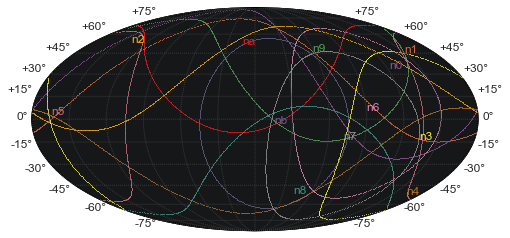

In [9]:
myGBM.detector_plot(radius=60)

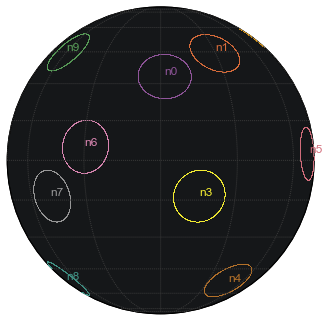

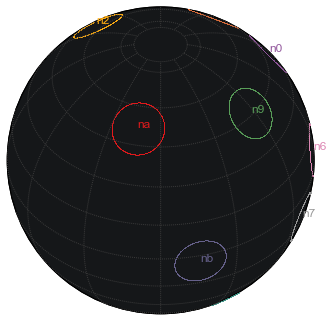

In [10]:
myGBM.detector_plot(radius=10,projection='ortho',lon_0=120)
myGBM.detector_plot(radius=10,projection='ortho',lon_0=0,lat_0=40,fignum=2)

### Capturing points on the sky

We can even see which detector's FOVs contain a point on the sky. We create a mock GRB SKycoord first.


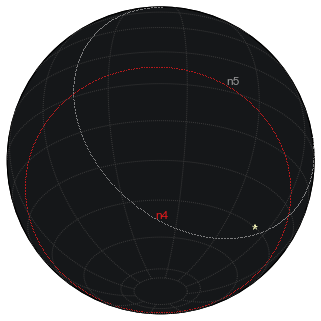

In [11]:
grb = SkyCoord(ra=130.,dec=-45 ,frame='icrs', unit='deg')


myGBM.detector_plot(radius=60,
                    projection='ortho',
                    good=True, # only plot NaIs that see the GRB
                    point=grb,
                    lon_0=170,lat_0=-30)

We can even look at the separation angles for the detectors and the source

In [12]:
seps = myGBM.get_separation(grb)

seps.sort("Separation")

seps

Detector,Separation
,deg
str2,float64
n4,41.2249365607
n5,56.8423184635
n8,83.5139010335
n3,83.9345607549
n2,97.7835315719
n1,114.448457985
n7,118.160976005
nb,122.682783534


## Examining Legal Detector Pairs

To see which detectors are valid, can look at the legal pairs map



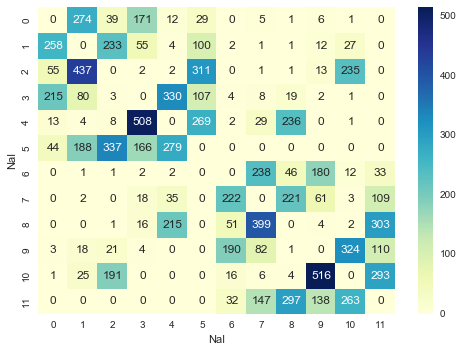

In [13]:
get_legal_pairs()